In [60]:
# Drew Lesh
# 11/17/25
# IBM Data Analyst Capstone Project - Data Visualization
# Line Charts

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# load data
df = pd.read_csv('survey_data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


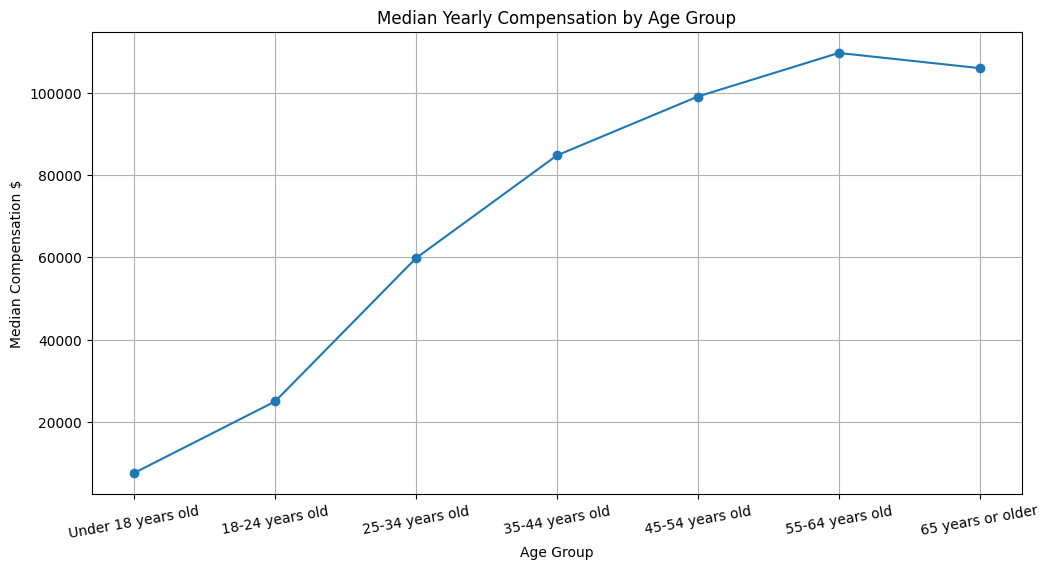

In [51]:
## TRENDS IN COMPENSATION OVER AGE GROUPS
# 1. Line Chart of Median Compensation by Age Group

df_1 = df[['Age', 'ConvertedCompYearly']].dropna()
df_1 = df_1[df_1['Age'] != 'Prefer not to say']

# Map ages to numeric values
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
median = df_1.groupby('Age')['ConvertedCompYearly'].median()
median = median.loc[sorted(median.index, key=lambda x: age_map[x])]

plt.figure(figsize=(12,6))
plt.plot(median.index, median.values, marker='o', linestyle='-')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation $')
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

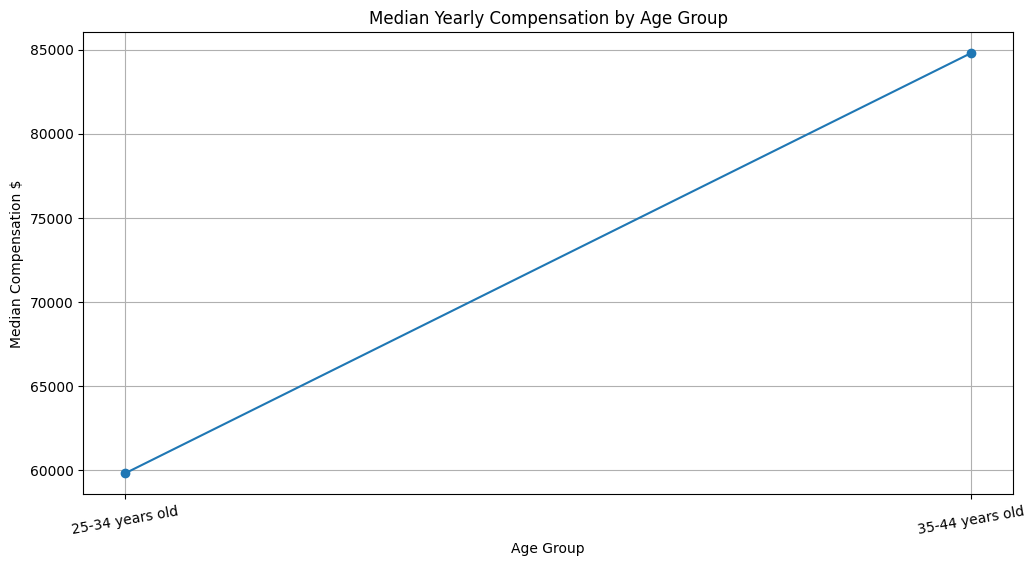

In [52]:
# 2. Line Chart of Median Yearly Compensation for Ages 25 - 45

df_1_2 = df[['Age', 'ConvertedCompYearly']].dropna()

df_1_2 = df_1_2[df_1_2['Age'] != 'Prefer not to say']

# filter ages
age_groups = ['25-34 years old', '35-44 years old']
df_1_2 = df_1_2[df_1_2['Age'].isin(age_groups)]

median = df_1_2.groupby('Age')['ConvertedCompYearly'].median()

plt.figure(figsize=(12,6))
plt.plot(median.index, median.values, marker='o', linestyle='-')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation $')
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

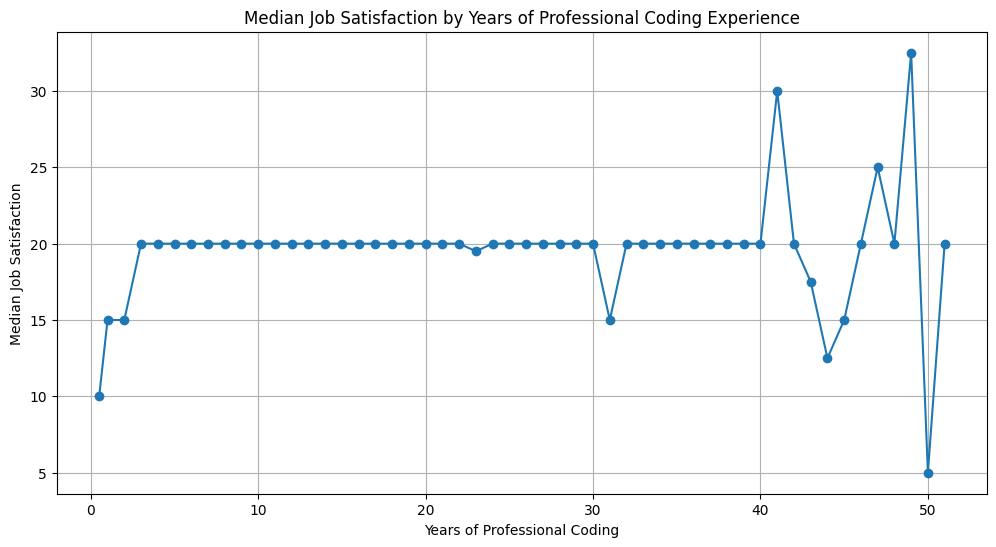

In [58]:
## Trends in Job Satisfaction by Experience Level
# 1. Line Chart of Job Satisfaction by Experience Level

df_2 = df[['YearsCodePro', 'JobSatPoints_6']].dropna()
years_map = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}
df_2['YearsCodePro'] = df_2['YearsCodePro'].map(years_map).fillna(df_2['YearsCodePro'])
df_2['YearsCodePro'] = pd.to_numeric(df_2['YearsCodePro'])
#print(df_2['YearsCodePro'].value_counts())

median_2 = df_2.groupby('YearsCodePro')['JobSatPoints_6'].median()

plt.figure(figsize=(12,6))
plt.plot(median_2.index, median_2.values, marker='o', linestyle='-')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Median Job Satisfaction')
plt.grid(True)
plt.show()

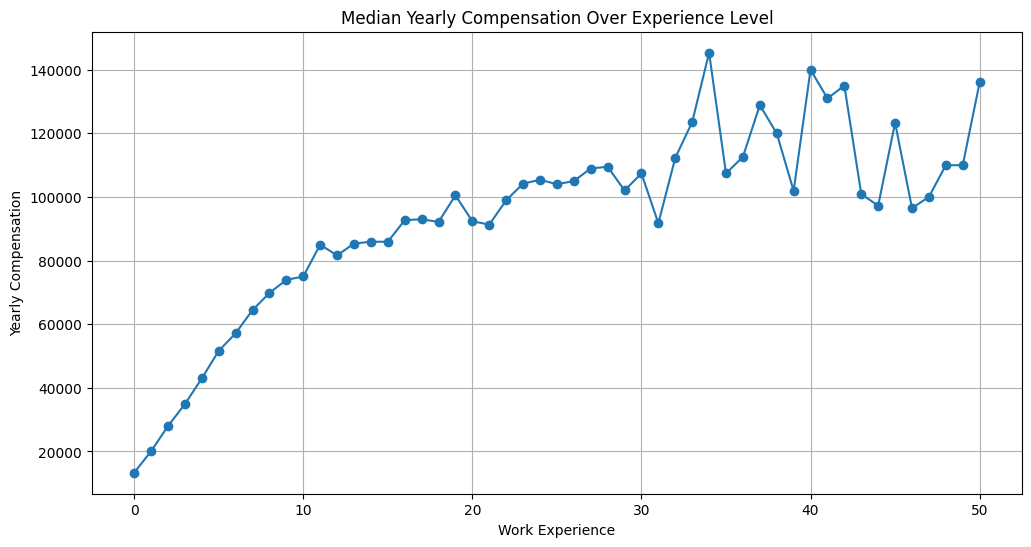

In [59]:
## Trends in Job Satisfaction and Compensation by Experience
# 1. Line Chart of Median Compensation Over Experience Level

df_3 = df[['WorkExp', 'ConvertedCompYearly']].dropna()

#df_3['WorkExp'].value_counts()

median_3 = df_3.groupby('WorkExp')['ConvertedCompYearly'].median()


plt.figure(figsize=(12,6))
plt.plot(median_3.index, median_3.values, marker='o', linestyle='-')
plt.title('Median Yearly Compensation Over Experience Level')
plt.xlabel('Work Experience')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

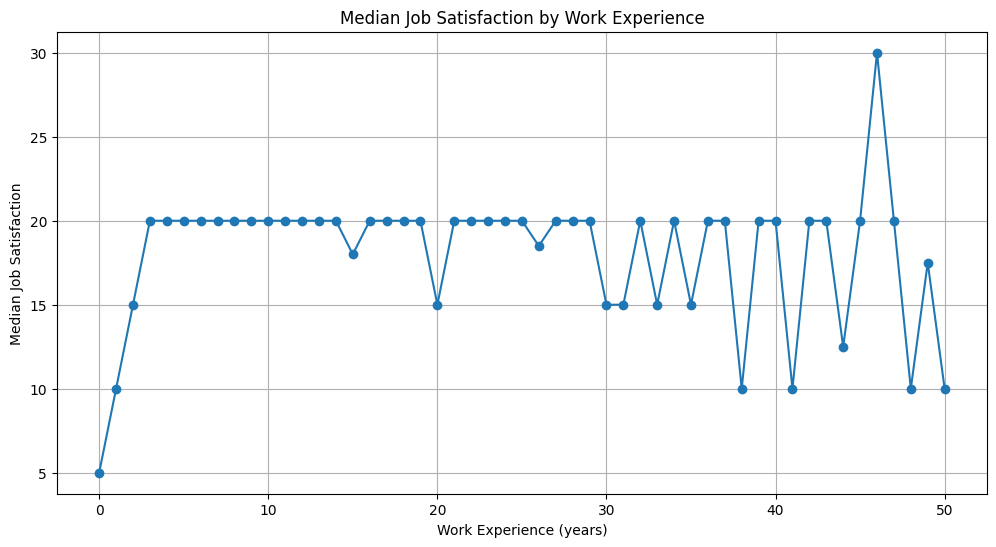

In [57]:
#2. Line Chart of Job Satisfaction Across Experience Levels

df_3_2 = df[['WorkExp', 'JobSatPoints_6']].dropna()

median_3_2 = df_3_2.groupby('WorkExp')['JobSatPoints_6'].median()

plt.figure(figsize=(12,6))
plt.plot(median_3_2.index, median_3_2.values, marker='o', linestyle='-')
plt.title('Median Job Satisfaction by Work Experience')
plt.xlabel('Work Experience (years)')
plt.ylabel('Median Job Satisfaction')
plt.grid(True)
plt.show()